# 구글 드라이브 권한 할당

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# EDA

## 데이터 불러오기

In [ ]:
data_path = '/content/drive/MyDrive/AI_12/Project1/vgames2.csv'

data = pd.read_csv( data_path )
data = data.drop( columns = ['Unnamed: 0'], axis = 1 ) # 불필요한 열 삭제
data.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
data.info() # 데이터 정보 확인 : Sales는 float형으로 & Year는 int형으로 바꿔줘야 함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


## Sales 단위 맞추기

In [ ]:
# K -> M 단위 맞춰주기 위한 함수 정의
def k_trans( value ):
    value = pd.to_numeric( value.str.replace( 'K', '' ) )
    value = value * 0.001
    return value

col_sales = data.columns[ data.columns.str.contains( 'Sales' ) == True ] 

for col in col_sales:
    data[ col ] = data[ col ].str.replace( 'M', '' ) # M 단위 삭제

    data_series = pd.Series( data[ col ].values.flatten() ) # 데이터프레임을 series 형태로 변환
    val_k = data_series[ data_series.str.contains('K') ]
    data_series[ k_trans( val_k ).index ] = k_trans( val_k ).values
    data[ col ] = data_series.to_frame()
    data[ col ] = pd.to_numeric( data[col] )

## 결측치 처리

### 결측치 확인

In [ ]:
data.isnull().sum()

# Year : 271
# Genre : 50
# Publisher : 58

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
data.describe(percentiles = [.25, .5, .75, .85, .9, 0.95 ])

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063
std,155.077168,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
85%,2012.000000,0.420000,0.220000,0.100000,0.070000
90%,2013.000000,0.610000,0.350000,0.180000,0.110000
95%,2015.000000,1.060000,0.630000,0.360000,0.200000


In [ ]:
# 지역별 Sales의 75% 값을 기준으로 데이터를 채우기로 결정
fill_condition = ( data['NA_Sales'] > 0.24 ) | ( data['EU_Sales'] > 0.11) | ( data['JP_Sales'] > 0.04 ) | ( data['Other_Sales'] > 0.04 )

### Genre 결측치 채우기

In [ ]:
# 지역별 75% 이상의 값을 기준으로 Genre의 결측치 확인 -> 27개
data.loc[ data['Genre'].isna() & fill_condition ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.00,0.03
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.10,0.06,0.00,0.18
4148,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,0.01,0.79,0.00,0.08
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.10,0.01,0.04


In [ ]:
# Genre 종류 확인
# gere = data.groupby( data['Genre] )
# genre.size()

# 'Action','Adventure','Fighting','Misc','Platform','Puzzle',
# 'Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'

# 게임 데이터 사이트를 통해 27개 데이터 직접 채우기
data.loc[ data.Name == 'Ape Escape: On the Loose', ('Genre') ] = 'Action'
data.loc[ data.Name == 'NBA Ballers', ('Genre') ] = 'Sports'
data.loc[ data.Name == 'NFL Street', ('Genre') ] = 'Sports'
data.loc[ data.Name == 'SingStar Singalong With Disney', ('Genre') ] = 'Action'
data.loc[ data.Name == 'Pokemon X/Pokemon Y', ('Genre') ] = 'Role-Playing'
data.loc[ data.Name == 'NASCAR Racing', ('Genre') ] = 'Racing'
data.loc[ data.Name == 'The Godfather: Dons Edition', ('Genre') ] = 'Action'
data.loc[ data.Name == 'MVP Baseball 2004', ('Genre') ] = 'Sports'
data.loc[ data.Name == 'Grand Theft Auto IV', ('Genre') ] = 'Action' # Action Adventure
data.loc[ data.Name == 'Dragon Ball Z: Ultimate Tenkaichi', ('Genre') ] = 'Action'
data.loc[ data.Name == 'Wii Party', ('Genre') ] = 'Misc'
data.loc[ data.Name == 'Chrono Cross', ('Genre') ] = 'Role-Playing'
data.loc[ data.Name == 'Madden NFL 11', ('Genre') ] = 'Sports'
data.loc[ data.Name == 'Final Fantasy XII', ('Genre') ] = 'Role-Playing'
data.loc[ data.Name == 'Bakemonogatari Portable', ('Genre') ] = 'Adventure'
data.loc[ data.Name == 'Puppy Palace', ('Genre') ] = 'Simulation'
data.loc[ data.Name == 'Yakuza 3', ('Genre') ] = 'Action' # Action Adventure
data.loc[ data.Name == 'F-Zero X', ('Genre') ] = 'Racing'
data.loc[ data.Name == 'Time Travelers', ('Genre') ] = 'Adventure'
data.loc[ data.Name == 'Ice Hockey', ('Genre') ] = 'Sports'
data.loc[ data.Name == 'Onimusha: Warlords', ('Genre') ] = 'Action' # Action Adventure
data.loc[ data.Name == 'Treasure Report: Kikai Jikake no Isan', ('Genre') ] = 'Puzzle'
data.loc[ data.Name == 'Skylanders Giants', ('Genre') ] = 'Action'
data.loc[ data.Name == 'James Bond 007: Nightfire', ('Genre') ] = 'Action'
data.loc[ data.Name == 'WarioWare, Inc.: Mega Party Game$', ('Genre') ] = 'Misc'
data.loc[ data.Name == 'Bloodborne', ('Genre') ] = 'Role-Playing'
data.loc[ data.Name == 'Need for Speed Underground 2', ('Genre') ] = 'Racing'


### Publisher 결측치 채우기

In [ ]:
# 지역별 75% 이상의 값을 기준으로 Publisher의 결측치 확인 -> 17개
data.loc[ data['Publisher'].isna() & fill_condition ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0.00,0.00,0.05,0.00
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0.00,0.00,0.06,0.00
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41
6209,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0.00,0.00,0.10,0.00
8236,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00
9128,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01
9684,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,NaN,0.15,0.05,0.14,0.01
10156,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,NaN,0.00,0.00,0.27,0.01


In [ ]:
data.loc[ data.Name == 'wwe Smackdown vs. Raw 2006', ('Publisher') ] = 'THQ'

### Year 결측치 채우기

In [ ]:
# 지역별 95% 이상의 값을 기준으로 Year의 결측치 확인 -> 21개
fill_condition2 = ( data['NA_Sales'] > 1.06 ) | ( data['EU_Sales'] > 0.63 ) | ( data['JP_Sales'] > 0.36 ) | ( data['Other_Sales'] > 0.2 )
data.loc[ data['Year'].isna() & fill_condition2 ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,THQ,1.57,1.02,0.00,0.41
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20
5144,Yakuza 4,PS3,NaN,Action,Sega,0.15,0.14,0.63,0.05
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01
6949,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71
8529,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22
9958,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0.00,0.28


In [ ]:
data.loc[ data.Name == 'Rock Band' ] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20
10776,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.0,0.22
12858,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.0,0.35


In [ ]:
data.loc[ data.Name == 'LEGO Batman: The Videogame' ] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29
3775,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0.0,0.29
4815,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0.0,0.01
5592,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0.0,0.32
5849,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.42,0.0,0.19
9641,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0.0,0.52
9958,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0.0,0.28


In [ ]:
# Rock Band 플랫폼 다르게 출시
data.loc[ ( ( data.Name == 'Rock Band' ) & ( data.Platform == 'Wii' ) ), ('Year') ] = 2008
data.loc[ ( ( data.Name == 'Rock Band' )& ( ~ ( data.Platform == 'Wii' ) ) ), ('Year') ] = 2007

# 'LEGO Batman: The Videogame' 플랫폼 다르게 출시
data.loc[ data.Name == 'LEGO Batman: The Videogame', ('Year') ] = 2008

data.loc[ data.Name == 'Call of Duty 3', ('Year') ] = 2006
data.loc[ data.Name == 'wwe Smackdown vs. Raw 2006', ('Year') ] = 2005
data.loc[ data.Name == 'Yakuza 4', ('Year') ] = 2011
data.loc[ data.Name == 'Adventure', ('Year') ] = 1978
data.loc[ data.Name == 'Madden NFL 2004', ('Year') ] = 2003
data.loc[ data.Name == 'LEGO Indiana Jones: The Original Adventures', ('Year') ] = 2008
data.loc[ data.Name == 'FIFA Soccer 2004', ('Year') ] = 2003
data.loc[ data.Name == 'WarioWare: Twisted!', ('Year') ] = 2005
data.loc[ data.Name == 'Call of Duty: Black Ops', ('Year') ] = 2010
data.loc[ data.Name == "Frogger's Adventures: Temple of the Frog", ('Year') ] = 2001
data.loc[ data.Name == 'Monster Hunter 2', ('Year') ] = 2006
data.loc[ data.Name == 'Rhythm Heaven', ('Year') ] = 2012
data.loc[ data.Name == 'Suikoden III', ('Year') ] = 2002
data.loc[ data.Name == 'Combat', ('Year') ] = 1977
data.loc[ data.Name == 'Space Invaders', ('Year') ] = 1978

### 나머지 결측치 제거

In [ ]:
data = data.dropna()

In [ ]:
# 결측치가 잘 제거 되었나 확인
data.isnull().sum().sum()

0

## Year 4 자리수

In [ ]:
# 1990년대
data['Year'] = data['Year'].apply( lambda x: x + 1900 if ( x < 100 ) & ( x > 23 ) else x )

# 2000년대
data['Year'] = data['Year'].apply( lambda x: x + 2000 if x < 23 else x )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 데이터 타입

In [ ]:
data['Year'] = data['Year'].astype( int )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16289 non-null  object 
 1   Platform     16289 non-null  object 
 2   Year         16289 non-null  int64  
 3   Genre        16289 non-null  object 
 4   Publisher    16289 non-null  object 
 5   NA_Sales     16289 non-null  float64
 6   EU_Sales     16289 non-null  float64
 7   JP_Sales     16289 non-null  float64
 8   Other_Sales  16289 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


# Feature Engineering

## Global_Sales 열 생성

In [ ]:
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Q1) 지역에 따라 선호하는 게임장르

## NA

In [ ]:
top_genre = data.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
top_genre1 = top_genre.sort_values('NA_Sales', ascending = False ).head(7) # 상위 7개 장르에 대해 내림차순 정렬

fig1 = px.bar( top_genre1, x = 'NA_Sales', y = 'Genre', title = 'Top 7 Genres in NA', color = 'Genre')
fig1.update_layout( height = 500, width = 1000, showlegend = False )
fig1.update_traces(marker_color = 'darkcyan' )
fig1.show()

## EU

In [ ]:
EU_top_genre = top_genre.sort_values('EU_Sales', ascending = False ).head(7) # 상위 7개 장르에 대해 내림차순 정렬

fig1 = px.bar( EU_top_genre, x = 'EU_Sales', y = 'Genre', title = 'Top 7 Genres in EU', color = 'Genre')
fig1.update_layout( height = 500, width = 1000, showlegend = False )
fig1.update_traces(marker_color = 'darkcyan' )
fig1.show()

## JP

In [ ]:
JP_top_genre = top_genre.sort_values('JP_Sales', ascending = False ).head(7) # 상위 7개 장르에 대해 내림차순 정렬

fig1 = px.bar( JP_top_genre, x = 'JP_Sales', y = 'Genre', title = 'Top 7 Genres in JP', color = 'Genre')
fig1.update_layout( height = 500, width = 1000, showlegend = False )
fig1.update_traces(marker_color = 'darkcyan' )
fig1.show()

## Other

In [ ]:
other_top_genre = top_genre.sort_values('Other_Sales', ascending = False ).head(7) # 상위 7개 장르에 대해 내림차순 정렬

fig1 = px.bar( other_top_genre, x = 'Other_Sales', y = 'Genre', title = 'Top 7 Genres in Other region', color = 'Genre')
fig1.update_layout( height = 500, width = 1000, showlegend = False )
fig1.update_traces(marker_color = 'darkcyan' )
fig1.show()

# Q2) 연도별 게임의 트렌드

## 연도 10년 단위로 맞추기

In [ ]:
year = data.groupby(['Genre','Year'])['Total_Sales'].agg('sum').reset_index()

# 1970년대
year['Year'] = year['Year'].apply( lambda x: (1970) if ( x < 1980 ) & ( x >= 1970 ) else x )
# 1980년대
year['Year'] = year['Year'].apply( lambda x: (1980) if ( x < 1990 ) & ( x >= 1980 ) else x )
# 1990년대
year['Year'] = year['Year'].apply( lambda x: (1990) if ( x < 2000 ) & ( x >= 1990 ) else x )
# 2000년대
year['Year'] = year['Year'].apply( lambda x: (2000) if ( x < 2010 ) & ( x >= 2000 ) else x )
# 2010년대
year['Year'] = year['Year'].apply( lambda x: (2010) if ( x < 2020 ) & ( x >= 2010 ) else x )
# 2020년대
year['Year'] = year['Year'].apply( lambda x: (2020) if ( x < 2022 ) & ( x >= 2020 ) else x )

year = year.groupby(['Genre','Year'])['Total_Sales'].agg('sum').reset_index()

In [ ]:
action = year.loc[year.Genre == 'Action']
adventure = year.loc[year.Genre == 'Adventure']
fight = year.loc[year.Genre == 'Fighting']
misc = year.loc[year.Genre == 'Misc']
platform = year.loc[year.Genre == 'Platform']
puzzle = year.loc[year.Genre == 'Puzzle']
racing = year.loc[year.Genre == 'Racing']
role = year.loc[year.Genre == 'Role-Playing']
shoot = year.loc[year.Genre == 'Shooter']
sim = year.loc[year.Genre == 'Simulation']
sports = year.loc[year.Genre == 'Sports']
strategy = year.loc[year.Genre == 'Strategy']


In [ ]:
# 2000년대 판매량 상위 7개 게임장르
genre_2000 = year.loc[year.Year==2000].sort_values('Total_Sales',ascending=False).head(7)
genre_2000['Genre'].unique()

array(['Action', 'Sports', 'Misc', 'Racing', 'Shooter', 'Role-Playing',
       'Platform'], dtype=object)

## 2000년대 상위 7개 장르에 대한 연도별 판매량 시각화(10년 단위)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=action['Year'], 
        y=action['Total_Sales'], 
        mode='lines',
        name='Action',
    ))

fig.add_trace(go.Scatter(
        x=shoot['Year'], 
        y=shoot['Total_Sales'], 
        mode='lines',
        name='Shooter',
    ))

fig.add_trace(go.Scatter(
        x=misc['Year'], 
        y=misc['Total_Sales'], 
        mode='lines',
        name='Misc',
    ))
fig.add_trace(go.Scatter(
        x=platform['Year'], 
        y=platform['Total_Sales'], 
        mode='lines',
        name='Platform',
    ))

fig.add_trace(go.Scatter(
        x=racing['Year'], 
        y=racing['Total_Sales'], 
        mode='lines',
        name='Racing',
    ))
fig.add_trace(go.Scatter(
        x=role['Year'], 
        y=role['Total_Sales'], 
        mode='lines',
        name='Role-Playing',
    ))

fig.add_trace(go.Scatter(
        x=sports['Year'], 
        y=sports['Total_Sales'], 
        mode='lines',
        name='Sports',
    ))

fig.update_layout(title="2000년대 상위 7개 장르에 대한 연도별 판매량 시각화")
fig.update_xaxes(type='category')
fig.show()

## 2000년대 상위 7개 장르에 대한 연도별 판매량 시각화(1년 단위)

In [ ]:
year2 = data.groupby(['Genre','Year'])['Total_Sales'].agg('sum').reset_index()
year2 = year2.loc[year2.Year >=2000 ]

action = year2.loc[year2.Genre == 'Action']
adventure = year2.loc[year2.Genre == 'Adventure']
fight = year2.loc[year2.Genre == 'Fighting']
misc = year2.loc[year2.Genre == 'Misc']
platform = year2.loc[year2.Genre == 'Platform']
puzzle = year2.loc[year2.Genre == 'Puzzle']
racing = year2.loc[year2.Genre == 'Racing']
role = year2.loc[year2.Genre == 'Role-Playing']
shoot = year2.loc[year2.Genre == 'Shooter']
sim = year2.loc[year2.Genre == 'Simulation']
sports = year2.loc[year2.Genre == 'Sports']
strategy = year2.loc[year2.Genre == 'Strategy']

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=action['Year'], 
        y=action['Total_Sales'], 
        mode='lines',
        name='Action',
    ))

fig.add_trace(go.Scatter(
        x=shoot['Year'], 
        y=shoot['Total_Sales'], 
        mode='lines',
        name='Shooter',
    ))

fig.add_trace(go.Scatter(
        x=misc['Year'], 
        y=misc['Total_Sales'], 
        mode='lines',
        name='Misc',
    ))
fig.add_trace(go.Scatter(
        x=platform['Year'], 
        y=platform['Total_Sales'], 
        mode='lines',
        name='Platform',
    ))

fig.add_trace(go.Scatter(
        x=racing['Year'], 
        y=racing['Total_Sales'], 
        mode='lines',
        name='Racing',
    ))
fig.add_trace(go.Scatter(
        x=role['Year'], 
        y=role['Total_Sales'], 
        mode='lines',
        name='Role-Playing',
    ))

fig.add_trace(go.Scatter(
        x=sports['Year'], 
        y=sports['Total_Sales'], 
        mode='lines',
        name='Sports',
    ))

fig.update_layout(title="2000년대 상위 7개 장르에 대한 연도별 판매량 시각화")
fig.update_xaxes(type='category')
fig.show()

## 2000년대 장르별 비중 시각화

In [ ]:
year2000 = year.loc[ year.Year == 2000 ]

fig  = go.Figure()
fig.add_trace(go.Pie(
    labels=year2000['Genre'], 
    values=year2000['Total_Sales'],
    hole = 0.3 ,
    pull=[0.1, 0, 0, 0.07, 0, 0, 0, 0, 0, 0, 0.07, 0],
))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Percent of sales by Genre in 2000")
fig.show()

## 2010년대 장르별 비중 시각화

In [ ]:
year2010 = year.loc[ year.Year == 2010 ]

fig  = go.Figure()
fig.add_trace(go.Pie(
    labels=year2010['Genre'], 
    values=year2010['Total_Sales'],
    hole = 0.3 ,
    pull=[0.1, 0, 0, 0, 0, 0, 0, 0, 0.07, 0, 0.07, 0],
))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Percent of sales by Genre in 2010")
fig.show()

# Q3) 출고량이 높은 게임에 대한 분석 및 시각화

## 출고량 상위 20개의 게임

In [ ]:
same_name = data.groupby(['Name'])['Total_Sales'].agg('sum').reset_index() # 동일한 게임에 대해 다른 플랫폼을 가지는 데이터가 있어 Sales만 보기 위해 그룹화
top_20 = same_name.sort_values( by = 'Total_Sales', ascending = False ).head(20) # 출고량이 가장 높은 20개의 게임

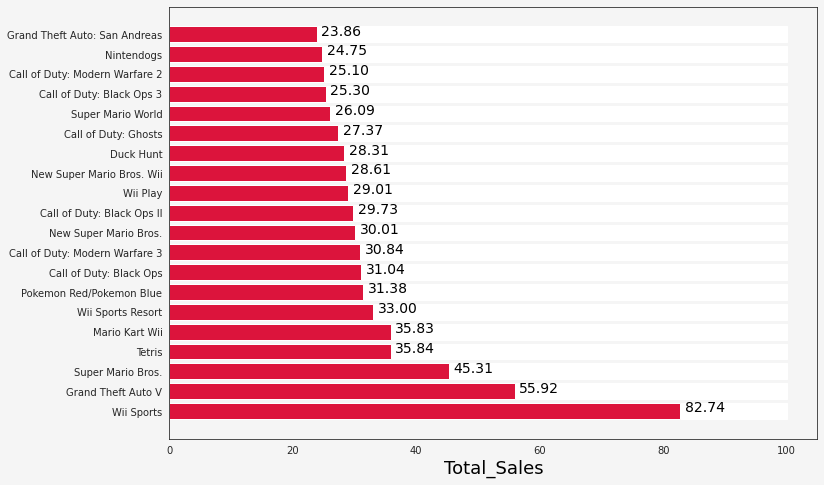

In [ ]:
fig = plt.figure( facecolor = 'whitesmoke' )
sns.set_style('white')

axes1 = fig.add_axes([0, 0, 1.5, 1.5]) 

axes1.barh(width=100, y=top_20['Name'], color='white')
axes1.barh(width=top_20['Total_Sales'], y=top_20['Name'], color='crimson')
axes1.set_facecolor('whitesmoke')
axes1.set_xlabel('Total_Sales', fontsize=18, color='black')
# axes1.set_ylabel('Name', fontsize=18, color='black')

for p in axes1.patches[20:]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.2f}'.format(width), (4+ width, y + height*0.45), ha='center', fontsize=14, color='black')

fig.show()

## 게임 시리즈 데이터 생성

In [ ]:
# Wii Sports
wiisports = data.loc[ data.Name.str.contains('Wii Sports') ]
wiisports_total = wiisports['Total_Sales'].agg('sum')

# Grand Theft Auto
grand = data.loc[ data.Name.str.contains('Grand Theft Auto') ]
grand_total = grand['Total_Sales'].agg('sum')

# Super Mario Bros.
supermario = data.loc[ data.Name.str.contains('Super Mario Bros.') ]
supermario_total = supermario['Total_Sales'].agg('sum')

# Call of Duty
call = data.loc[ data.Name.str.contains('Call of Duty') ]
call_total = call['Total_Sales'].agg('sum')

# 시리즈 게임 데이터프레임 생성
series_top = pd.DataFrame([['Wii Sports', wiisports_total],
              ['Grand Theft Auto', grand_total],
              ['Super Mario Bros', supermario_total],
              ['Call of Duty', call_total] ],columns = ['Series_Name','Series_Sales'])
series_top

,Series_Name,Series_Sales
0,Wii Sports,116.14
1,Grand Theft Auto,161.62
2,Super Mario Bros,153.85
3,Call of Duty,247.43


## Top 20 내 4개의 시리즈 게임 Sales 시각화

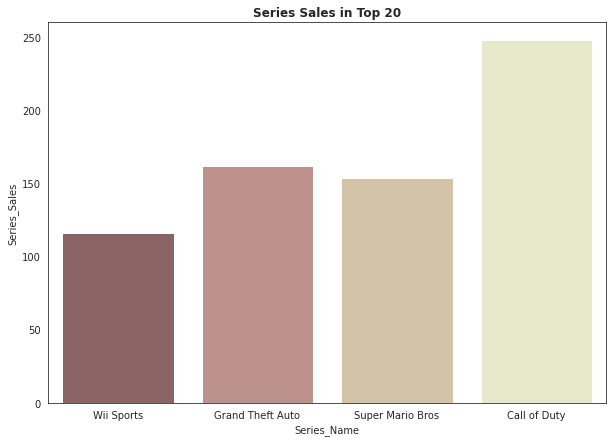

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = series_top['Series_Name'], y = series_top['Series_Sales'],palette="pink")
plt.title("Series Sales in Top 20",fontweight="bold")
plt.show()

## Call of Duty 연도별 판매량

In [ ]:
CallofDuty = data.loc[ data.Name.str.contains('Call of Duty') ]
CallofDuty = CallofDuty.groupby(['Name','Year',])['Total_Sales'].agg('sum').reset_index()
CallofDuty = CallofDuty.sort_values(by='Year',ascending = True)
CallofDuty

,Name,Year,Total_Sales
8,Call of Duty: Finest Hour,2004,4.50
0,Call of Duty 2,2005,2.08
1,Call of Duty 3,2006,7.56
2,Call of Duty 4: Modern Warfare,2007,18.26
16,Call of Duty: Roads to Victory,2007,2.14
18,Call of Duty: World at War,2008,15.88
19,Call of Duty: World at War Final Fronts,2008,1.73
10,Call of Duty: Modern Warfare 2,2009,25.10
14,Call of Duty: Modern Warfare: Mobilized,2009,0.42
15,Call of Duty: Modern Warfare: Reflex Edition,2009,1.52


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=CallofDuty['Name'], 
        y=CallofDuty['Total_Sales'], 
        mode='lines',
        name='Action',
    ))

In [ ]:
CallofDuty_top4 = CallofDuty.sort_values(by = 'Total_Sales',ascending=False).head(4)
CallofDuty_top4 = CallofDuty_top4.sort_values( by = 'Year', ascending =True)
CallofDuty_top4

,Name,Year,Total_Sales
5,Call of Duty: Black Ops,2010,31.04
11,Call of Duty: Modern Warfare 3,2011,30.84
7,Call of Duty: Black Ops II,2012,29.73
9,Call of Duty: Ghosts,2013,27.37


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=CallofDuty_top4['Name'], 
        y=CallofDuty_top4['Total_Sales'], 
        mode='lines',
        name='Action',
    ))

In [ ]:
callof = data.loc[ data.Name.str.contains('Call of Duty')]

In [ ]:
CallofDuty_Platform = callof.groupby('Platform')['Total_Sales'].agg('sum').reset_index()
CallofDuty_Platform_top4 = CallofDuty_Platform.sort_values(by = 'Total_Sales',ascending = False ).head(4)

In [ ]:
plat_genre_callof = data[ data['Name'].isin( CallofDuty_top4['Name'].unique() ) & data['Platform'].isin( CallofDuty_Platform_top4['Platform'].unique())]

fig = px.sunburst(plat_genre_callof, path=['Name', 'Platform'], values='Total_Sales')
fig.show()